In [1]:
using PyPlot

In [2]:
include("src/utils.jl")

vandermonde (generic function with 1 method)

# Problem 13.3 #

In [3]:
M = [1971 2250;
    1972 2500;
    1974 5000;
    1978 29000;
    1982 120000;
    1985 275000;
    1989 1180000;
    1993 3100000;
    1997 7500000;
    1999 24000000;
    2000 42000000;
    2002 220000000;
    2003 410000000];

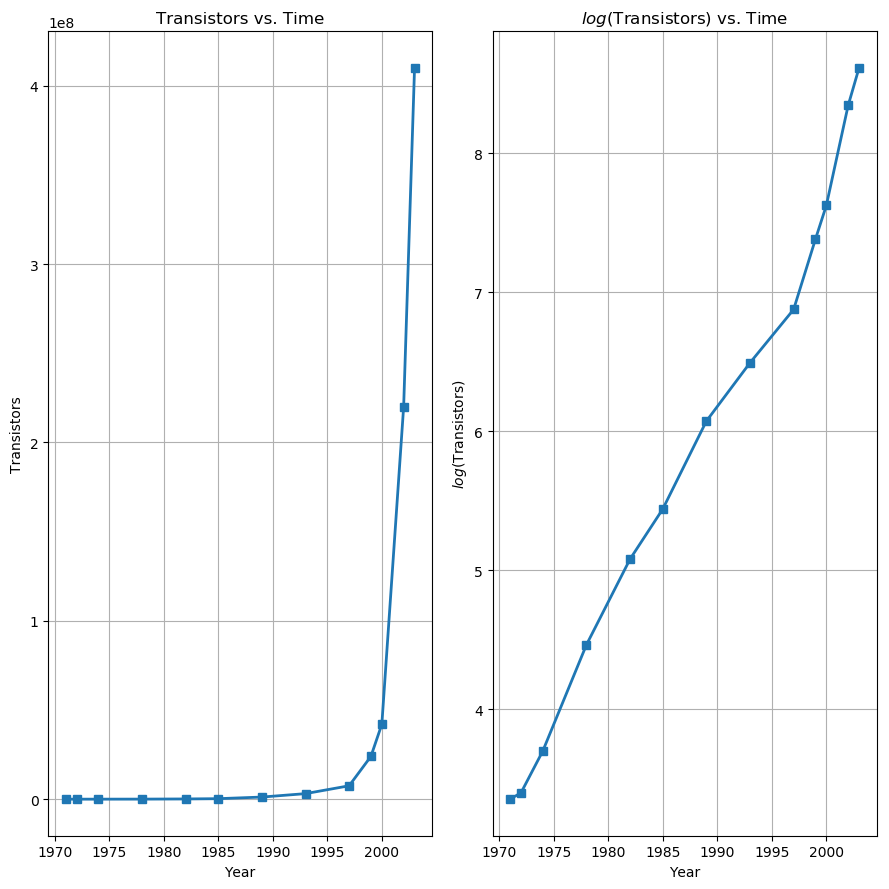

In [4]:
figure(figsize=(9,9));

subplot(121)
plot(M[:,1], M[:,2], linewidth=2, marker="s");
title("Transistors vs. Time");
xlabel("Year");
ylabel("Transistors");
grid(true);

subplot(122);
plot(M[:,1], log10.(M[:,2]), linewidth=2, marker="s");
title(L"$log$(Transistors) vs. Time");
xlabel("Year");
ylabel(L"$log$(Transistors)");
grid(true);

PyPlot.tight_layout();

## Part A ##

In [5]:
offset_year = 1970;
m = size(M, 1);
b = log10.(M[:,2]);

t = M[:,1] - offset_year;
A = [t ones(m,1)];

In [6]:
x_ols = A\b;
b_ols = A * x_ols;

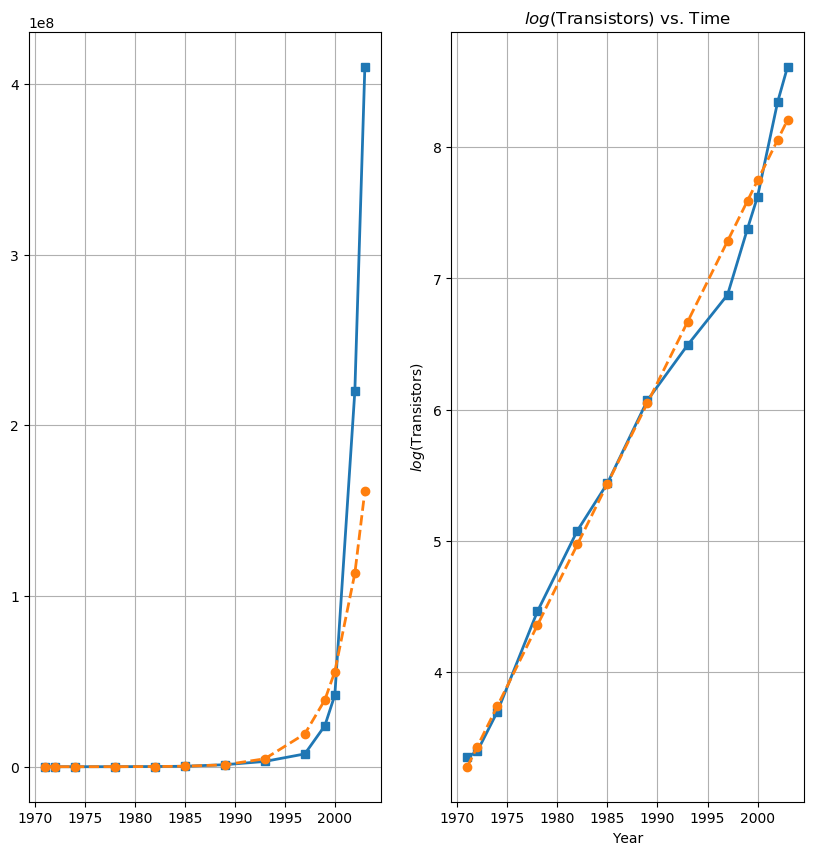

In [7]:
figure(figsize=(10,10));

subplot(121)
plot(M[:,1], M[:,2], linewidth=2, marker="s");
plot(M[:,1], 10.^b_ols, linewidth=2, linestyle="--", marker="o");
grid(true);

subplot(122)
plot(M[:,1], b, linewidth=2, marker="s");
plot(M[:,1], b_ols, linewidth=2, linestyle="--", marker="o");

title(L"$log$(Transistors) vs. Time")
xlabel("Year")
ylabel(L"$log$(Transistors)");
grid(true);

In [8]:
r = b - b_ols;
rmse = sqrt(mean(r.^2));
println("RMSE: $rmse");

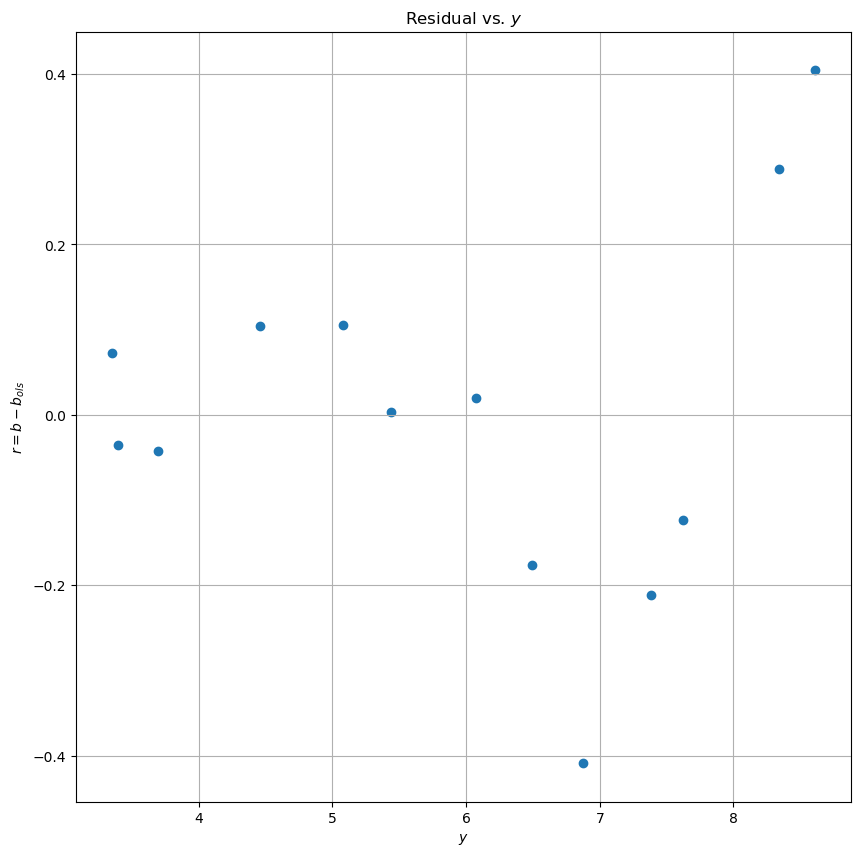

RMSE: 0.20307668716659


In [9]:
figure(figsize=(10,10));

scatter(b, r);
title(L"Residual vs. $y$")
xlabel(L"$y$")
ylabel(L"$r =b-b_{ols}$")
grid(true)

## Part B ##

In [10]:
yr_to_predict = 2015;
a = vec([yr_to_predict-offset_year 1]);
predict = 10.^(a' * x_ols);
actual = 4e9;
pct_diff = ((predict - actual) / actual - 1) * 100;
println("Pct error of prediction on year $yr_to_predict: $pct_diff %");

## Part C ##

In [11]:
delta_t = yr_to_predict - M[1,1];
lower_moore = M[1,2] * 2^(delta_t / 2);
pct_diff_2_yr = ((lower_moore - actual) / actual - 1)* 100

println("Using Moore's law of doubling every 2 years, on year $yr_to_predict we achieve: $pct_diff_2_yr error %");

In [12]:
upper_moore = M[1,2] * 2^(delta_t / 1.5)
pct_diff_1_and_half_yr = ((upper_moore - actual) / actual - 1)* 100;

println("Using Moore's law of doubling every 1.5 years, on year $yr_to_predict we achieve: $pct_diff_1_and_half_yr error %");

# Problem 13.7 #

Given a time series $z_1,z_2,\ldots, z_T$ where $z_{t+1} = \sum_{i=1}^M \beta_i z_{t-M+i}$ we can estimate the coefficients $\beta_i$ by solving the least squares problem $||A\beta - y||^2$ where $A\in \mathbf{R}^{(T-M) \times M}$ is the toeplitz matrix

$$ A = \begin{bmatrix}
    z_1 & z_2 & \ldots & z_M\\
    z_2 & z_3 & \ldots & z_{M+1}\\
    \vdots & \vdots & \ddots & \vdots \\
    z_{T-M-1} & z_{T-M} & \cdots & z_{T-1}\\
\end{bmatrix}
$$
and $y\in \mathbf{R}^{T-M}$ is the vector 

$$y = \begin{bmatrix}
    z_{M+1} \\
    z_{M+2} \\
    \vdots \\
    z_{T} \\
\end{bmatrix}
$$

In [13]:
srand(1)
M = 10;
beta = rand().^ vec(1:M);
T = 50;
Z = zeros(T,1);
Z[1:M,1] = randn(M,1);

for i = M+1:T
  Z[i:i,1] = beta' * Z[i-M:i-1,1]; 
end

noise_std = 0.05;
Z = Z + noise_std * randn(T,1);

Pct error of prediction on year 2015: 84.67592171746708 %
Using Moore's law of doubling every 2 years, on year 2015 we achieve: 35.92960000000001 error %
Using Moore's law of doubling every 1.5 years, on year 2015 we achieve: 37848.34167465949 error %


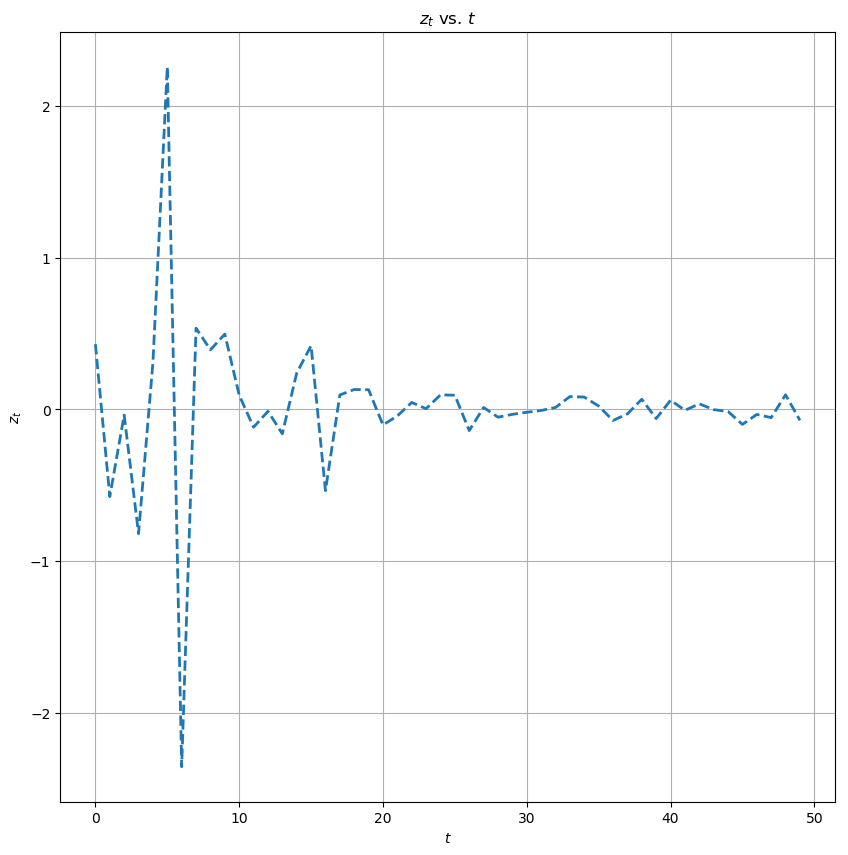

In [14]:
figure(figsize=(10,10));
plot(Z[:,1], linestyle="--", linewidth=2);

title(L"$z_t$ vs. $t$");
xlabel(L"$t$");
ylabel(L"$z_t$");
grid(true);

In [15]:
A = zeros(T - M,M);
for i = 1:T-M 
    end_index = i + M -1;
    A[i,:] = Z[i:end_index,1];
end

In [16]:
b = Z[M+1:end];
beta_hat = A\b;

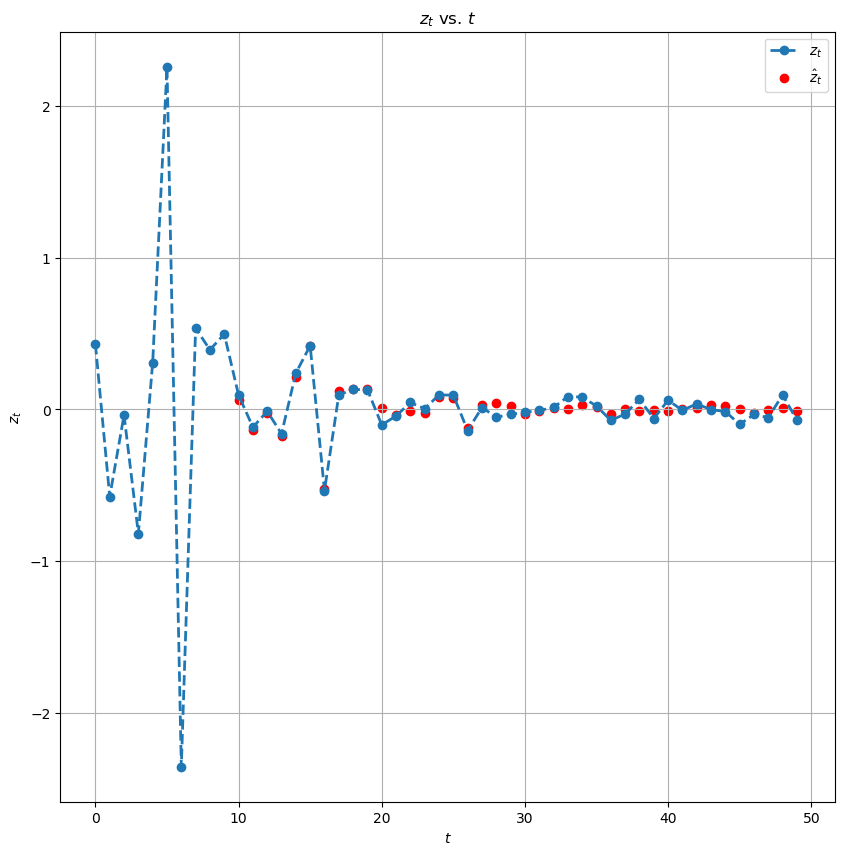

In [17]:
figure(figsize=(10,10))
plot(Z[:,1], linestyle="--", linewidth=2, label=L"$z_t$", marker="o");
scatter(M:T-1, A * beta_hat, label=L"\hat{z}_t", color="r");

title(L"$z_t$ vs. $t$");
xlabel(L"$t$");
ylabel(L"$z_t$");
legend();
grid(true);

In [18]:
r = A * beta_hat - b;
rmse = sqrt(mean(r.^2));

println("RMSE of model fit: $rmse");

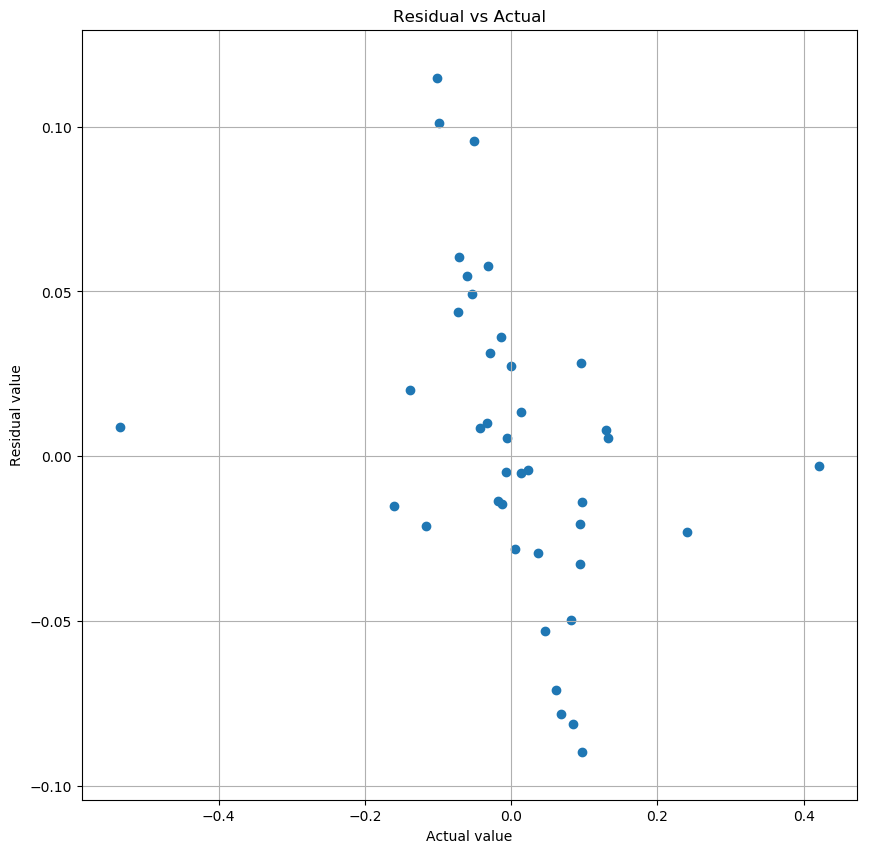

RMSE of model fit: 0.046862624891010854


In [19]:
figure(figsize=(10,10));
scatter(b, r);
grid(true);
title("Residual vs Actual");
xlabel("Actual value");
ylabel("Residual value");

# Problem 13.7 #

The discrete convolution of an impulse response $h$ with an input signal $x$ is defined as $y_t = \sum_{j=1}^n h_j x_{t-j+1}$ where $x_t = 0$ for $ t\le 0$

The convolution can be written equivalently as $y = A h$ where $A\in \mathbf{R}^{(T+n-1)\times n}$ is given by the toeplitz matrix

$$ A=
\begin{bmatrix}
x_1 & 0 & 0 & \cdots & 0\\
x_2 & x_1 & 0 & \cdots & 0\\
x_3 & x_2 & x_1 & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots\\
0& 0 & 0 & \cdots & x_{T}\\
\end{bmatrix}
$$

In [20]:
srand(5);

T = 200;
n = 10;
h = rand() .^ vec(1:n);
x = sin.(log.(1:T));

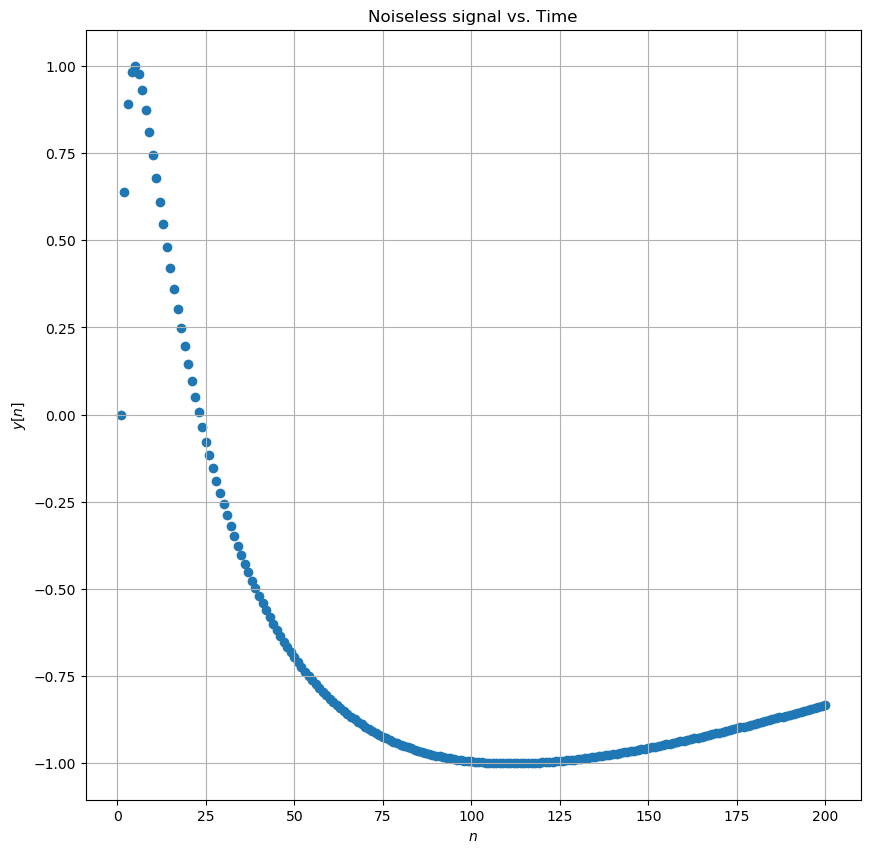

In [21]:
figure(figsize=(10,10));

scatter(1:T, x);
grid(true);

title("Noiseless signal vs. Time");
xlabel(L"$n$");
ylabel(L"$y[n]$");

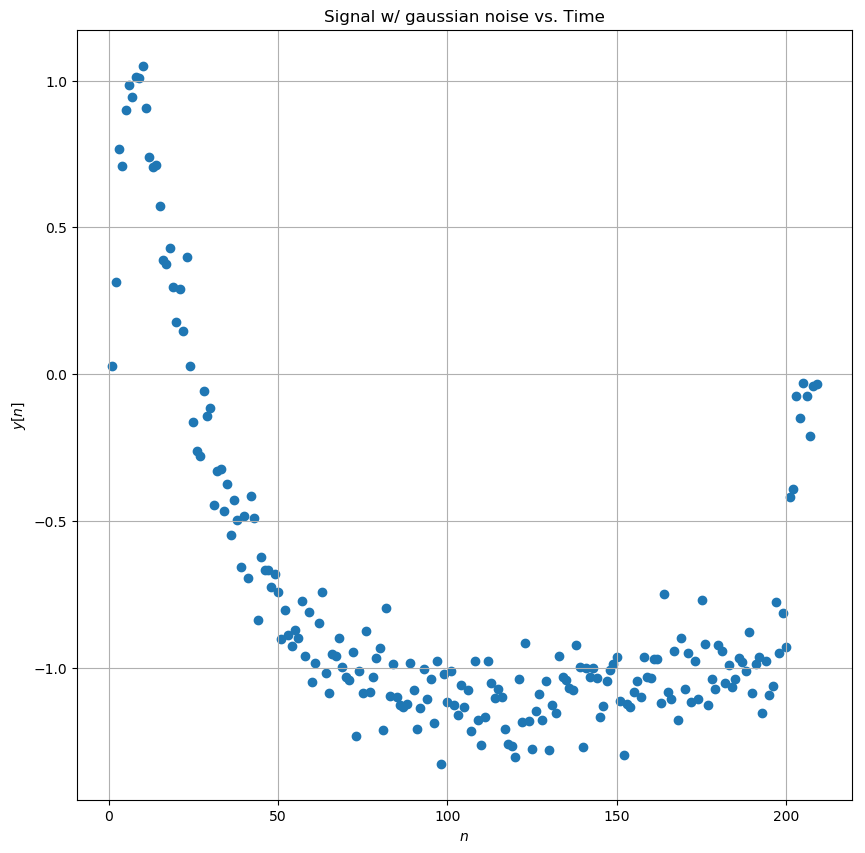

In [22]:
noise_std = 0.1;
y = conv(h, x) + noise_std * randn(T+n-1);

figure(figsize=(10,10));

scatter(1:T+n-1, y);
title("Signal w/ gaussian noise vs. Time");
xlabel(L"$n$");
ylabel(L"$y[n]$");
grid(true);

In [23]:
A = zeros(T + n - 1, n);
for i = 1:T+n-1
    if i < n
        A[i,1:i] = x[i:-1:1];
    elseif i < T
        A[i,:] = x[i:-1:i-n+1];
    else
        A[i,i-T+1:end] = x[T:-1:i-n+1];
    end   
end

In [24]:
h_hat = A \ y;
y_hat = A * h_hat;
r = y_hat - y;

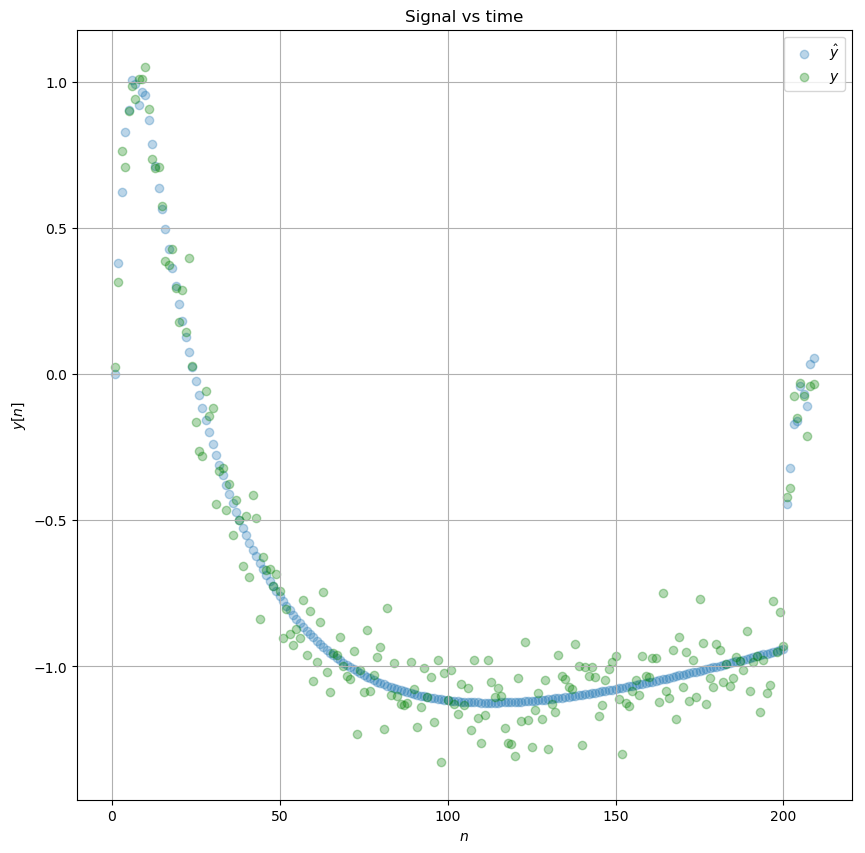

In [25]:
figure(figsize=(10,10));

scatter(1:size(y_hat,1), y_hat, alpha=0.3, label=L"$\hat{y}$");
scatter(1:size(y,1), y, color="g", alpha=0.3, label=L"$y$");

grid(true);
legend();

title("Signal vs time");
xlabel(L"n");
ylabel(L"$y[n]$");


In [26]:
rmse = sqrt(mean(r.^2));
coeff_rmse = sqrt(mean((h_hat - h).^2));
println("Model root mean square error: $rmse");
println("Fitted coefficient root mean square error: $coeff_rmse");

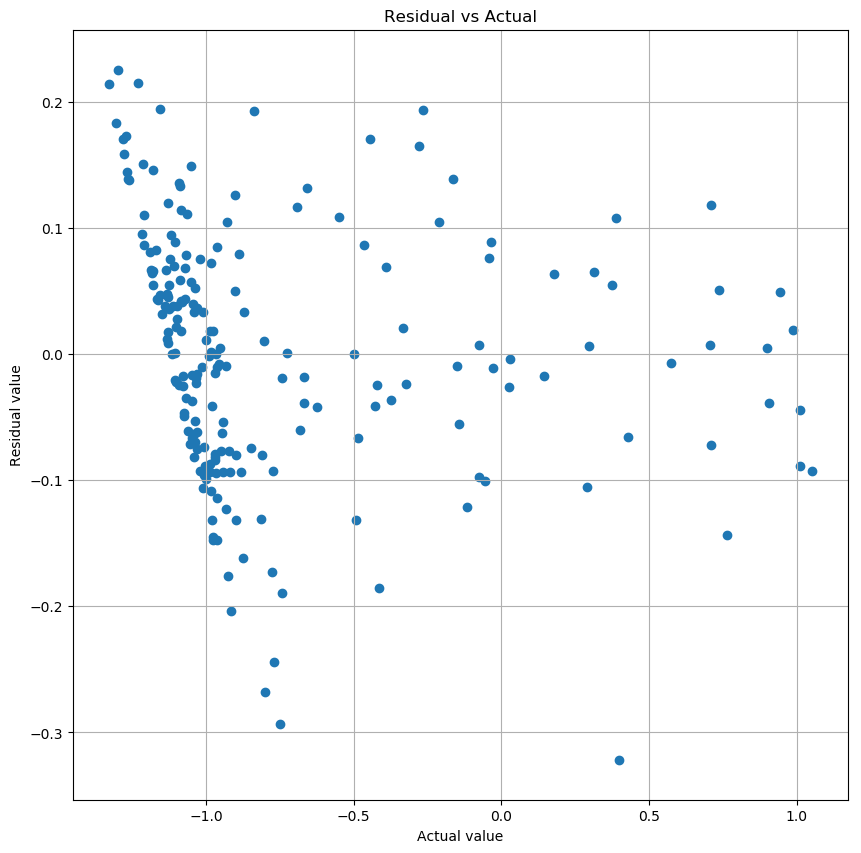

Model root mean square error: 0.09818722366386808
Fitted coefficient root mean square error: 0.08791252954693647


In [27]:
figure(figsize=(10,10));

scatter(y, r);
grid(true);
title("Residual vs Actual");
xlabel("Actual value");
ylabel("Residual value");

# Problem 13.15 #

Given we have observations $x_1,x_2,\ldots,x_N$ and $y_1,y_2,\ldots,y_N$ from an approximately linear system $y\approx Ax$ we can estimate $A$ by solving the least squares problem with objective 

$$\sum_{i=1}^N ||Ax_i -y_i||^2 = ||AX - Y||^2$$

Framed another way, we want to minimize $||X^TA^T-Y^T||^2 = \sum_{i=1}^M ||X^Ta_i - y_i||^2$ where $a_i$ is the $i$th row of $A$. This amounts to solving $M$ independent least squares problems. The solution of which is given by $\hat{A} = YX^T(XX^T)^{-1}$

# Problem 13.16 #

The residual of a regression problem with a log transformed output is given by $r = \log(y) - \log(\hat{y})$. The relative fitting error is given by $\eta = \max\left\{\hat{y}/y, y /\hat{y}\right\} - 1$. 

Using the definition of the residual we have $\eta = \max\left\{e^{-r}, e^r \right\} - 1 = e^{|r|}-1$

# Problem 13.17 #

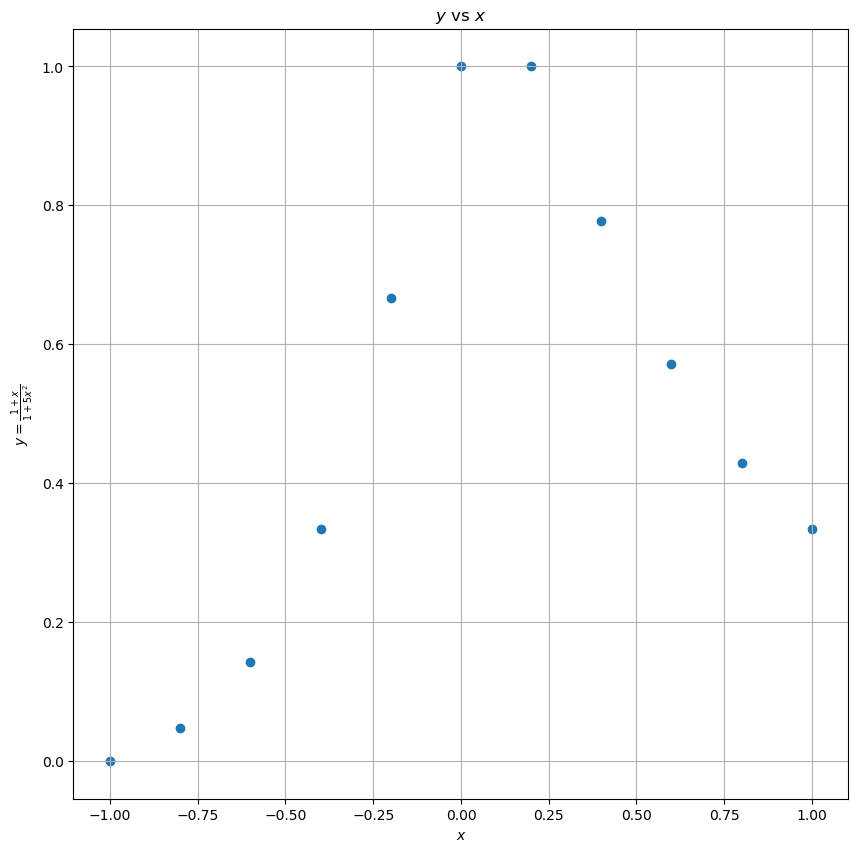

In [28]:
figure(figsize=(10,10));

x = linspace(-1,1,11);
y = (1 + x) ./ (1 + 5 * x .^ 2);

scatter(x,y);
title(L"$y$ vs $x$");
xlabel(L"$x$");
ylabel(L"$y = \frac{1+x}{1+5x^2}$");
grid(true);

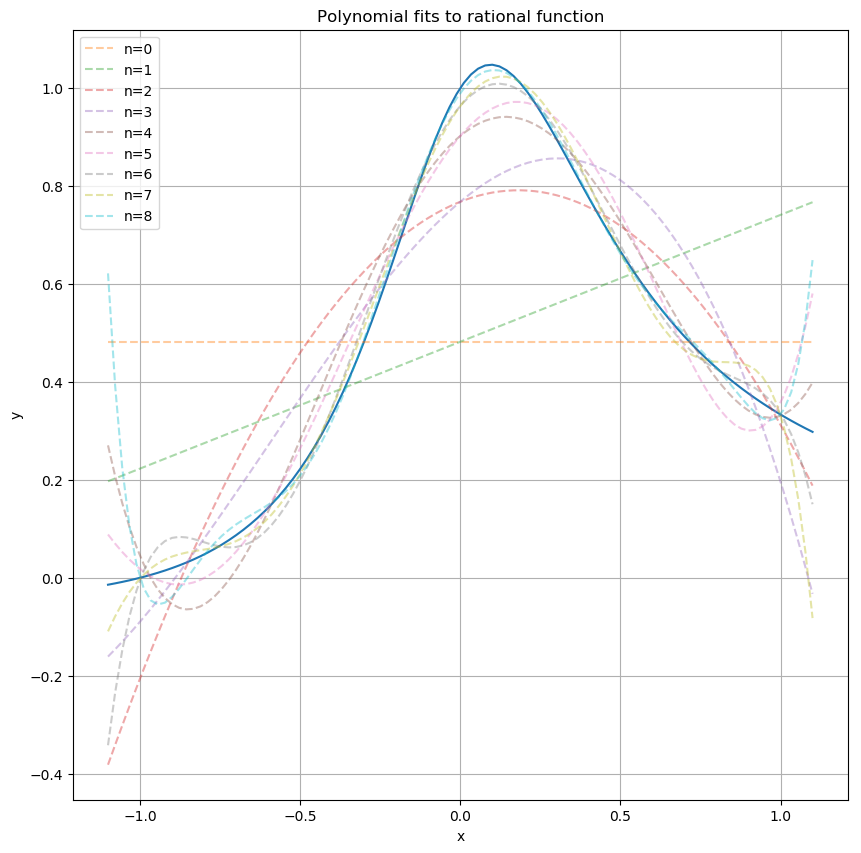

In [29]:
figure(figsize=(10,10));

x_plot = linspace(-1.1, 1.1, 100);
y_plot = (1 + x_plot) ./ (1 + 5 * x_plot .^ 2);

plot(x_plot, y_plot);
max_deg = 8;
rmse_train = zeros(max_deg + 1);
rmse_test = zeros(max_deg + 1);

for i = 0:max_deg
    A = vandermonde(x, i);
    theta = A \ y;

    A_plot = vandermonde(x_plot, i);
    plot(x_plot, A_plot * theta, "--", alpha=0.4, label="n=$i");
    rmse_train[i + 1] = sqrt(mean((y - A * theta).^2));
    rmse_test[i + 1] = sqrt(mean((y_plot - A_plot * theta).^2));
end

legend();
title("Polynomial fits to rational function");
xlabel("x");
ylabel("y");
grid(true);

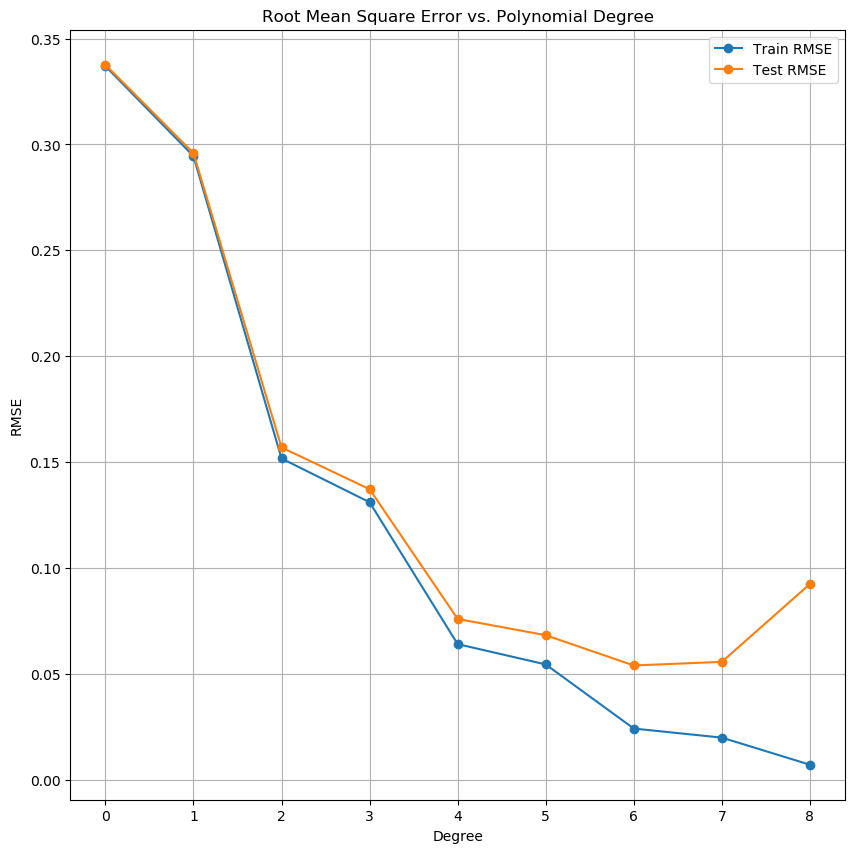

In [30]:
figure(figsize=(10,10));

plot(rmse_train, label="Train RMSE", marker="o");
plot(rmse_test, label="Test RMSE", marker="o");
legend();
title("Root Mean Square Error vs. Polynomial Degree");
xlabel("Degree");
ylabel("RMSE");
grid(true);

# Problem 13.18 #

Consider the vector auto-regressive model $\hat{z}_{t+1} = \beta_1 z_t + \cdots \beta_M z_{t-M+1}$ where each $z$ is an $n$-vector and the $\beta_i$'s  are $n\times n$ matrices

To estimate the $\beta$ matrices we can use least squares to minimize
$$\sum_{i=M+1}^T ||z_{i} -\hat{z}_i||^2$$

Start by noting that $\hat{z}_{M+1} = X B_{M:1}$ where 

$$
X =
\begin{bmatrix}
\beta_1 & \beta_2 & \cdots & \beta_M
    \end{bmatrix}$$
and 
$$
B_{M:1} = 
\begin{bmatrix}
    z_M \\
    z_{M-1} \\
    \vdots \\
    z_1\\
\end{bmatrix}
$$

The least squares problem is then the minimization of 
$$\sum_{i=1}^{T-M} ||z_{M+i} - X B_{M+i:i}||^2$$

This can rewritten as 
$$ ||XA - Y||^2$$ 
where 
$$ A =
\begin{bmatrix}
z_M & z_{M+1} & \cdots & z_{T-1}\\
z_{M-1} & z_{M} & \cdots & z_{T-2}\\
\vdots \\
z_1 & z_2 & \cdots & z_{T-M}\\
\end{bmatrix},
$$


$$
Y =
\begin{bmatrix}
z_{M+1} & z_{M+2} & \cdots & z_{T}
\end{bmatrix}
$$

The least squares problem can be cast as $||A^TX^T-Y^T||^2$ which has solution $\hat{X}^T = (AA^T)^{-1}AY^T$

In [31]:
srand(3);

n = 2;
M = 3;
T = 20;
sigma = 20;

z0 = rand(n, M);
X = randn(n, n * M);

In [32]:
Z = zeros(n, T);
Z[:, 1:M] = z0;

for i = 1:T-M
    a = flipdim(Z[:, i:M+i-1], 2);
    z = vec(reshape(a, n * M));
    Z[:, i+M] = X * z;
end

Z[:, M+1:T] += sigma * randn(n, T - M);  # The system has measurement noise but no process noise

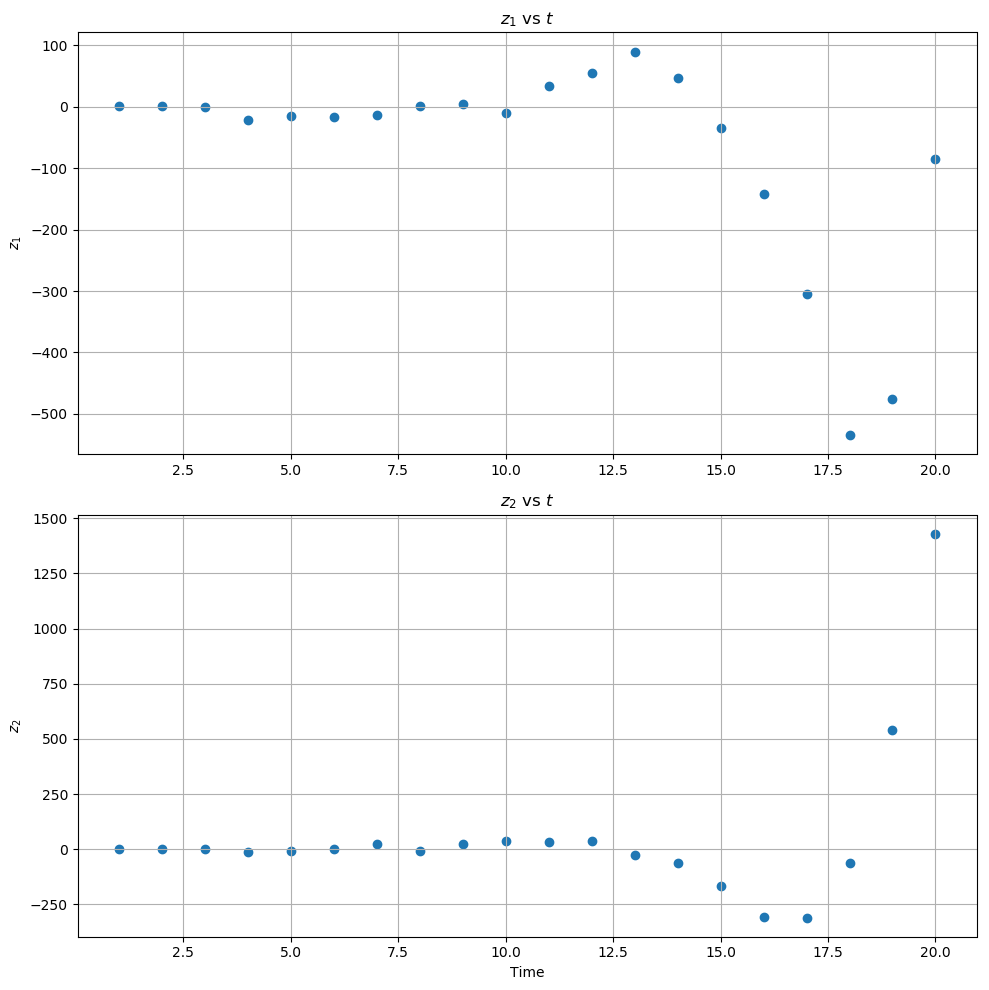

In [33]:
figure(figsize=(10,10));

subplot(211);
scatter(1:T, Z[1,:]);
grid(true);
ylabel(L"$z_1$");
title(L"$z_1$ vs $t$");

subplot(212);
scatter(1:T, Z[2,:]);
grid(true);
xlabel("Time");
ylabel(L"$z_2$");
title(L"$z_2$ vs $t$");
tight_layout();

In [34]:
row_dim = M * n;
A = zeros(row_dim, T - M);
Y = zeros(n, T - M);

for i = 1:T-M
    a = flipdim(Z[:, i:i+M-1], 2);
    acol = vec(reshape(a, row_dim));
    A[:,i] = acol;
    Y[:,i] = Z[:, i + M];
end

In [35]:
X_hat = (A'\Y')';
Z_hat = X_hat * A;

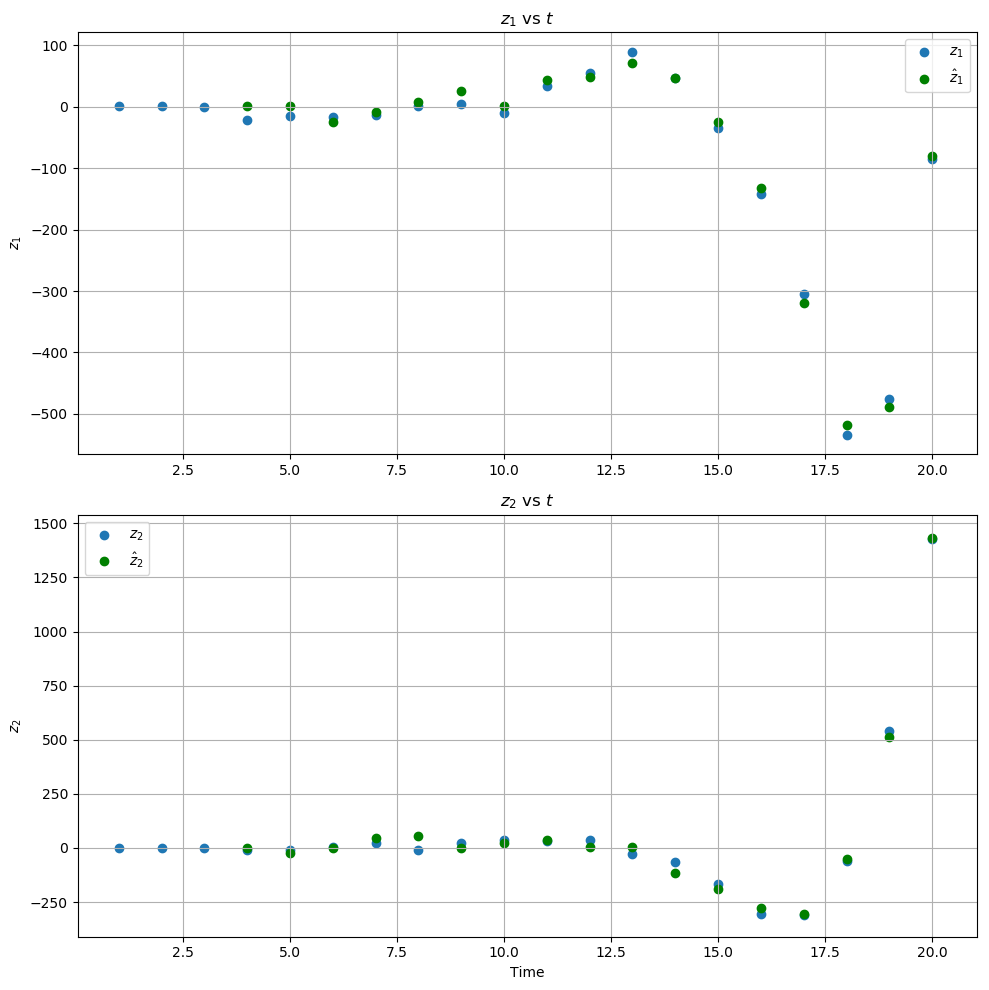

In [36]:
figure(figsize=(10,10));

subplot(211);
scatter(1:T, Z[1,:], label=L"$z_1$");
scatter(M+1:T, Z_hat[1,1:T-M],color="g", label=L"$\hat{z}_1$");
grid(true);
ylabel(L"$z_1$");
title(L"$z_1$ vs $t$");
legend();

subplot(212);
scatter(1:T, Z[2,:], label=L"$z_2$");
scatter(M+1:T, Z_hat[2,1:T-M], color="g", label=L"$\hat{z}_2$");
grid(true);
legend();

xlabel("Time");
ylabel(L"$z_2$");
title(L"$z_2$ vs $t$");
tight_layout();

In [37]:
rmse = sqrt(1/(T*n) * sum((Z_hat[:,1:T-M] - Z[:, M+1:T]).^2));
print("RMSE of model fit: $rmse");

RMSE of model fit: 19.851683131284624

# Problem 13.19 #

The Fourier series is defined by 
$$z_t \approx \hat{z}_t = \sum_{k=1}^K a_k\cos(\omega_k t - \phi_k) = \sum_{k=1}^K a_k\cos(\omega_k t)\cos(\phi_k) + a_k\sin(\omega_k t)\sin(\phi_k)$$
Given a time series and the frequencies $\omega_k$ we can use least squares to solve the problem
$$
\left\lVert\begin{bmatrix}
\cos(\omega_1) & \sin(\omega_1 ) & \cos(\omega_2 ) & \sin(\omega_2 ) & \cdots & \cos(\omega_K ) & \sin(\omega_K ) \\
\cos(2\omega_1) & \sin(2\omega_1 ) & \cos(2\omega_2 ) & \sin(2\omega_2 ) & \cdots & \cos(2\omega_K ) & \sin(2\omega_K ) \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots\\
\cos(N\omega_1) & \sin(N\omega_1 ) & \cos(N\omega_2 ) & \sin(N\omega_2 ) & \cdots & \cos(N\omega_K ) & \sin(N\omega_K )
\end{bmatrix}
\begin{bmatrix}
\alpha_1\\
\beta_1\\
\vdots \\
\alpha_K\\
\beta_K\\
\end{bmatrix} - 
\begin{bmatrix}
z_1\\
z_2\\
\vdots\\
z_{N-1}\\
z_N
\end{bmatrix}\right\rVert^2
$$

where $\alpha_k = a_k\cos(\phi_k)$ and $\beta_k = a_k \sin(\phi_k)$. We can then solve for $a_k$ and $\phi_k$ using the equalities $a_k = \sqrt{\alpha_k^2 + \beta_k^2}$ and $\phi_k = \tan^{-1}(\beta_k/\alpha_k)$.